In [24]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

"""
I40000 I40000 IBM3JD 7000GC aul test_cta 7696581394432 20200205 FULL|DISABLED
I40001 I40001 IBM3JD 7000GC aul test_cta 7696581394432 20200204 FULL|DISABLED
I40002 I40002 IBM3JD 7000GC aul test_cta 7696581394432 20200205 FULL|DISABLED
I40003 I40003 IBM455 7000GC aul supply_IBM4JC 7696581394432 20200206 
"""

capacities = {"7000GC" : 7, "10TC" : 10, "15TC" : 15, "8000GC" : 8, "20TC" : 20, "12TC" : 12, "9TC" : 9}
totals_num = {"7000GC" : 0, "10TC" : 0, "15TC" : 0, "8000GC" : 0, "20TC" : 0, "12TC" : 0, "9TC" : 0}
totals_cap = {"7000GC" : 0, "10TC" : 0, "15TC" : 0, "8000GC" : 0, "20TC" : 0, "12TC" : 0, "9TC" : 0}
total_num = 0
total_cap = 0
pools_num = defaultdict(int)
pools_cap = defaultdict(lambda: defaultdict(int))
libs_num  = defaultdict(lambda: defaultdict(int))

f = open("vmgrlisttape-s.txt")

reader = csv.reader(f, delimiter=' ')

for line in reader:
    tapetype = line[3]
    # print(tapetype, capacities[tapetype])
    total_num += 1
    total_cap += capacities[tapetype]
    totals_num[tapetype] += 1
    totals_cap[tapetype] += capacities[tapetype]
    pools_num[line[5]] += 1
    pools_cap[line[5]][tapetype] += 1
    libs_num[line[2]][tapetype] += 1
f.close()

In [25]:
print("There are " + str(total_num) + " tapes")

There are 29354 tapes


In [26]:
totals_num

{'7000GC': 6011,
 '10TC': 42,
 '15TC': 14989,
 '8000GC': 53,
 '20TC': 1000,
 '12TC': 160,
 '9TC': 7099}

In [29]:
totals_cap

{'7000GC': 42077,
 '10TC': 420,
 '15TC': 224835,
 '8000GC': 424,
 '20TC': 20000,
 '12TC': 1920,
 '9TC': 63891}

In [30]:
pools_cap["r_atlas_prod"]

defaultdict(int,
            {'7000GC': 336, '15TC': 1172, '20TC': 25, '9TC': 373, '12TC': 2})

In [31]:
libs_num

defaultdict(<function __main__.<lambda>()>,
            {'IBM3JD': defaultdict(int, {'7000GC': 1419, '10TC': 41}),
             'IBM455': defaultdict(int,
                         {'7000GC': 4592, '15TC': 6516, '10TC': 1}),
             'IBM355': defaultdict(int, {'15TC': 8466}),
             'IBM360': defaultdict(int, {'15TC': 7, '20TC': 1000}),
             'IBM1L8': defaultdict(int, {'9TC': 7099, '12TC': 160}),
             'STK6T10D': defaultdict(int, {'8000GC': 53})})

In [21]:
pools_cap["r_atlas_raw"]

defaultdict(int,
            {'7000GC': 607, '15TC': 2593, '20TC': 27, '9TC': 719, '12TC': 9})

In [22]:
pools_cap["r_atlas"]

defaultdict(int, {'15TC': 38, '20TC': 4, '9TC': 170})

<Container object of 7 artists>

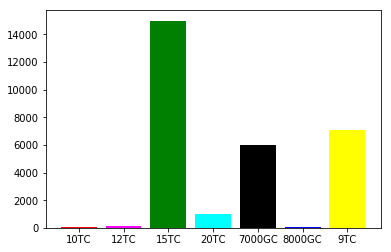

In [18]:
plt.bar(totals_num.keys(), totals_num.values(), color=['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow'])

<Container object of 7 artists>

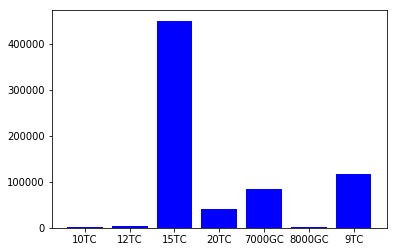

In [14]:
plt.bar(totals_cap.keys(), totals_cap.values(), color=["Blue"])